# WINTER HOLTS MODEL RK PURAM

In [1]:
import pandas as pd
from sklearn import preprocessing 
df = pd.read_excel (r'C:/Users/Kira/Desktop/Internship/Data/Delhi_Data-20210529T043217Z-001/Delhi_Data/RK_PURAM_MONTHLY_DATA.xlsx')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df

,From Date,PM2.5,PM1,NO,NO2,NOx,NH3,SO2,CO,Ozone
0,2013-01-31,238.402581,440.016129,137.740645,72.304839,261.235161,80.999032,19.117419,6.486774,29.058065
1,2013-02-28,153.191071,310.870357,88.437500,81.714286,195.578929,48.129643,14.771429,1.521786,38.622143
2,2013-03-31,104.222419,206.323871,96.660645,61.831935,185.970000,37.589032,63.851774,1.856129,64.526452
3,2013-04-30,113.373167,251.067667,53.969333,66.616500,132.149833,34.069667,23.560000,2.020333,70.981000
4,2013-05-31,118.867419,317.449355,16.721613,87.684516,102.607419,45.086452,23.457097,2.972903,78.601613
...,...,...,...,...,...,...,...,...,...,...
91,2020-08-31,15.057097,43.481290,10.348387,23.110000,28.620323,18.224516,9.794677,0.960323,27.300968
92,2020-09-30,48.916667,94.895667,20.971333,43.774667,40.302667,22.230333,15.480667,0.696000,34.200333
93,2020-10-31,137.285161,246.180323,61.755161,58.697419,80.421935,22.039677,15.777742,1.136452,47.390000
94,2020-11-30,222.617000,321.062667,105.368333,78.998333,127.303667,27.741667,17.005000,1.837000,40.028000


In [3]:
df['From Date']=pd.to_datetime(df['From Date'],dayfirst=True,errors='ignore')

In [4]:
df.head()

,From Date,PM2.5,PM1,NO,NO2,NOx,NH3,SO2,CO,Ozone
0,2013-01-31,238.402581,440.016129,137.740645,72.304839,261.235161,80.999032,19.117419,6.486774,29.058065
1,2013-02-28,153.191071,310.870357,88.437500,81.714286,195.578929,48.129643,14.771429,1.521786,38.622143
2,2013-03-31,104.222419,206.323871,96.660645,61.831935,185.970000,37.589032,63.851774,1.856129,64.526452
3,2013-04-30,113.373167,251.067667,53.969333,66.616500,132.149833,34.069667,23.560000,2.020333,70.981000
4,2013-05-31,118.867419,317.449355,16.721613,87.684516,102.607419,45.086452,23.457097,2.972903,78.601613


In [5]:
df = df.set_index('From Date')

<AxesSubplot:xlabel='From Date'>

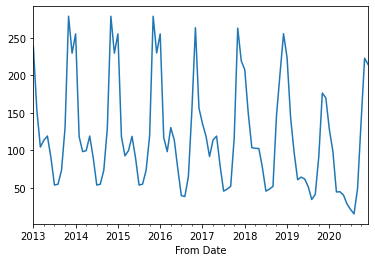

In [6]:
df['PM2.5'].plot()

In [7]:

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-8-491491a5a781>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df['PM2.5'],model='additive',freq=12).plot();


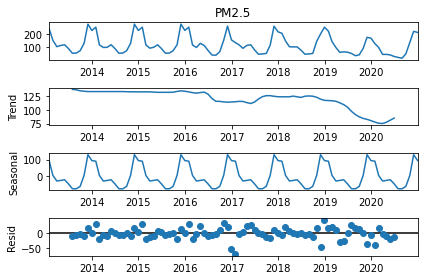

In [8]:
seasonal_decompose(df['PM2.5'],model='additive',freq=12).plot();

<ipython-input-9-ab9474734445>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df['PM2.5'],model='multiplicative',freq=12).plot();


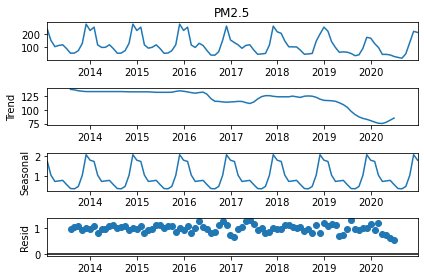

In [9]:
seasonal_decompose(df['PM2.5'],model='multiplicative',freq=12).plot();

In [10]:
feature_train=df.loc['2013-01-01':'2017-12-31','PM2.5']
feature_test=df.loc['2018-01-01':'2019-12-31','PM2.5']

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [12]:
feature_train

From Date
2013-01-31    238.402581
2013-02-28    153.191071
2013-03-31    104.222419
2013-04-30    113.373167
2013-05-31    118.867419
2013-06-30     89.824000
2013-07-31     53.505161
2013-08-31     54.649355
2013-09-30     73.316667
2013-10-31    129.718710
2013-11-30    278.557000
2013-12-31    229.329032
2014-01-31    255.046774
2014-02-28    117.976071
2014-03-31     98.089194
2014-04-30     99.309333
2014-05-31    118.867419
2014-06-30     89.824000
2014-07-31     53.505161
2014-08-31     54.649355
2014-09-30     73.316667
2014-10-31    129.718710
2014-11-30    278.557000
2014-12-31    229.329032
2015-01-31    255.046774
2015-02-28    117.976071
2015-03-31     92.522903
2015-04-30     99.309333
2015-05-31    118.418065
2015-06-30     89.824000
2015-07-31     53.505161
2015-08-31     54.734839
2015-09-30     73.316667
2015-10-31    119.111129
2015-11-30    278.557000
2015-12-31    229.642581
2016-01-31    255.046774
2016-02-29    116.957931
2016-03-31     98.089194
2016-04-30    1

In [13]:
hwmodel=ExponentialSmoothing(feature_train,trend='add', seasonal='add', seasonal_periods=12).fit()

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [14]:
pred=hwmodel.forecast(24)

In [15]:
pred

2018-01-31    213.687523
2018-02-28    110.789377
2018-03-31     82.789164
2018-04-30     97.079461
2018-05-31    103.587999
2018-06-30     70.620518
2018-07-31     34.946794
2018-08-31     35.981037
2018-09-30     53.229632
2018-10-31    115.749148
2018-11-30    258.256340
2018-12-31    198.595737
2019-01-31    208.989316
2019-02-28    106.091170
2019-03-31     78.090957
2019-04-30     92.381253
2019-05-31     98.889791
2019-06-30     65.922311
2019-07-31     30.248586
2019-08-31     31.282830
2019-09-30     48.531425
2019-10-31    111.050941
2019-11-30    253.558133
2019-12-31    193.897529
Freq: M, dtype: float64

<AxesSubplot:xlabel='From Date'>

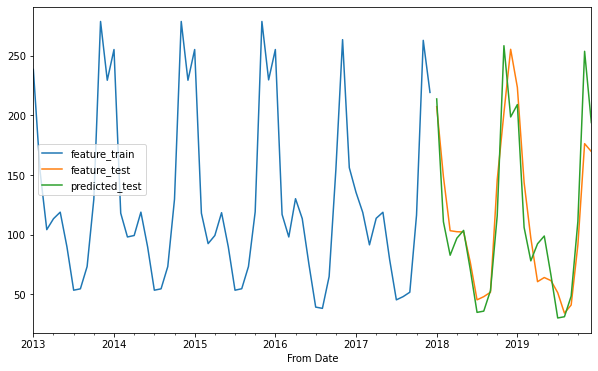

In [16]:
feature_train.plot(legend=True, label='feature_train', figsize=(10,6))
feature_test.plot(legend=True, label='feature_test')

pred.plot(legend=True, label='predicted_test')

In [22]:
pred2=hwmodel.forecast(36)

In [23]:
pred2

2018-01-31    213.687523
2018-02-28    110.789377
2018-03-31     82.789164
2018-04-30     97.079461
2018-05-31    103.587999
2018-06-30     70.620518
2018-07-31     34.946794
2018-08-31     35.981037
2018-09-30     53.229632
2018-10-31    115.749148
2018-11-30    258.256340
2018-12-31    198.595737
2019-01-31    208.989316
2019-02-28    106.091170
2019-03-31     78.090957
2019-04-30     92.381253
2019-05-31     98.889791
2019-06-30     65.922311
2019-07-31     30.248586
2019-08-31     31.282830
2019-09-30     48.531425
2019-10-31    111.050941
2019-11-30    253.558133
2019-12-31    193.897529
2020-01-31    204.291109
2020-02-29    101.392963
2020-03-31     73.392749
2020-04-30     87.683046
2020-05-31     94.191584
2020-06-30     61.224104
2020-07-31     25.550379
2020-08-31     26.584622
2020-09-30     43.833218
2020-10-31    106.352733
2020-11-30    248.859926
2020-12-31    189.199322
Freq: M, dtype: float64

<AxesSubplot:xlabel='From Date'>

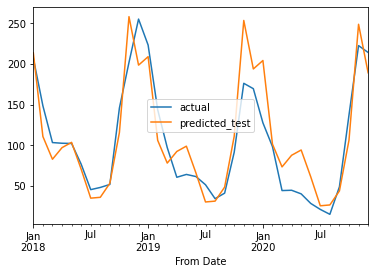

In [27]:
actual=df.loc['2018-01-01':'2020-12-31','PM2.5']
actual.plot(legend=True, label='actual')
pred2.plot(legend=True, label='predicted_test')

In [17]:
import numpy as np

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
np.sqrt(mean_squared_error(feature_test,pred))

29.72206557375926

In [20]:
feature_train.mean(), np.sqrt(feature_train.var())

(128.7162113057718, 71.87400754135021)

In [20]:
PM25comp = pd.read_excel (r'D:\Downloads\PM25comp (1).xlsx')

In [21]:
pred=list(pred)

In [22]:
PM25comp['Holts_winter']=pred

In [23]:
PM25comp

,Unnamed: 0,Prophet_pred,True,SARIMA,Holts_winter
0,0,226.357018,223.311935,196.499600,213.687523
1,1,104.292329,143.792857,115.664274,110.789377
2,2,79.137426,97.162419,90.508976,82.789164
3,3,81.861031,60.641333,109.268341,97.079461
4,4,106.701778,64.126774,112.459114,103.587999
5,5,81.636034,61.534000,77.546600,70.620518
6,6,44.784271,51.434839,43.318277,34.946794
7,7,43.218479,34.308387,44.546004,35.981037
8,8,50.015716,41.096000,58.578187,53.229632
9,9,99.327277,91.420000,123.438526,115.749148


In [24]:
PM25comp.to_excel("PM25comp.xlsx")

# PM10

<AxesSubplot:xlabel='From Date'>

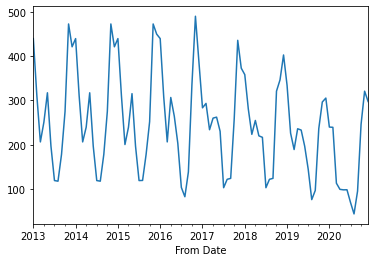

In [21]:
df['PM1'].plot()

<ipython-input-22-f95a065bcec6>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df['PM1'],model='additive',freq=12).plot();


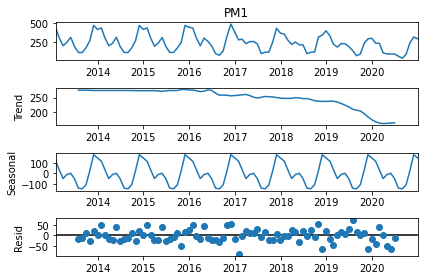

In [22]:
seasonal_decompose(df['PM1'],model='additive',freq=12).plot();

<ipython-input-23-ab9474734445>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df['PM2.5'],model='multiplicative',freq=12).plot();


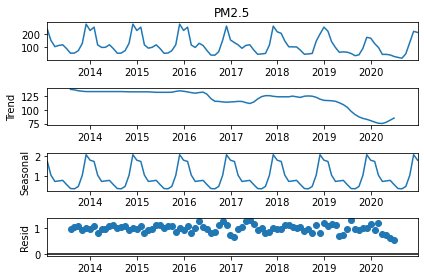

In [23]:
seasonal_decompose(df['PM2.5'],model='multiplicative',freq=12).plot();

In [24]:
feature_train_PM10=df.loc['2013-01-01':'2017-12-31','PM1']
feature_test_PM10=df.loc['2018-01-01':'2019-12-31','PM1']

In [25]:
hwmodel_PM10=ExponentialSmoothing(feature_train_PM10,trend='add', seasonal='mul', seasonal_periods=12).fit()

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [26]:
pred_PM10=hwmodel_PM10.forecast(24)

In [27]:
pred_PM10

2018-01-31    379.047741
2018-02-28    284.046548
2018-03-31    195.496999
2018-04-30    240.093625
2018-05-31    272.178015
2018-06-30    189.311476
2018-07-31    106.420745
2018-08-31    105.358425
2018-09-30    148.357839
2018-10-31    256.523779
2018-11-30    428.736690
2018-12-31    374.895271
2019-01-31    365.638787
2019-02-28    273.968587
2019-03-31    188.540204
2019-04-30    231.524439
2019-05-31    262.434726
2019-06-30    182.514325
2019-07-31    102.588284
2019-08-31    101.552800
2019-09-30    142.982864
2019-10-31    247.201830
2019-11-30    413.109283
2019-12-31    361.188745
Freq: M, dtype: float64

<AxesSubplot:xlabel='From Date'>

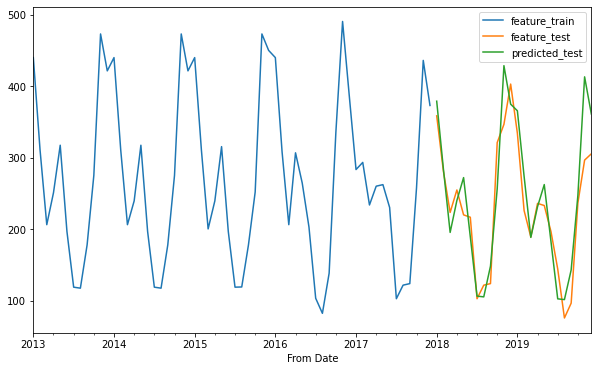

In [28]:
feature_train_PM10.plot(legend=True, label='feature_train', figsize=(10,6))
feature_test_PM10.plot(legend=True, label='feature_test')

pred_PM10.plot(legend=True, label='predicted_test')

In [29]:
np.sqrt(mean_squared_error(feature_test_PM10,pred_PM10))

42.42004149947745

In [30]:
feature_train_PM10.mean(), np.sqrt(feature_train_PM10.var())

(269.01721057237313, 116.10586808256338)

# NO

<AxesSubplot:xlabel='From Date'>

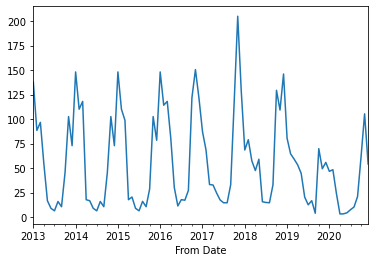

In [31]:
df['NO'].plot()

<ipython-input-32-05eddd976a16>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df['NO'],model='additive',freq=12).plot();


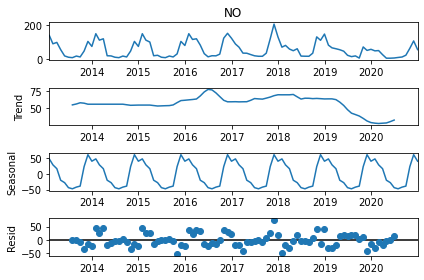

In [32]:
seasonal_decompose(df['NO'],model='additive',freq=12).plot();

<ipython-input-33-75f172ae206b>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df['NO'],model='multiplicative',freq=12).plot();


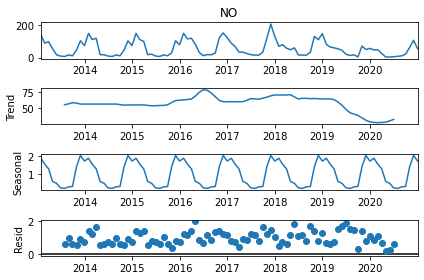

In [33]:
seasonal_decompose(df['NO'],model='multiplicative',freq=12).plot();

In [34]:
feature_train_NO=df.loc['2013-01-01':'2017-12-31','NO']
feature_test_NO=df.loc['2018-01-01':'2019-12-31','NO']

In [35]:
hwmodel_NO=ExponentialSmoothing(feature_train_NO,trend='add', seasonal='mul', seasonal_periods=12).fit()

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [36]:
pred_NO=hwmodel_NO.forecast(24)

In [37]:
pred_NO

2018-01-31    119.834952
2018-02-28     91.883253
2018-03-31     71.934605
2018-04-30     45.527877
2018-05-31     26.227545
2018-06-30     15.081732
2018-07-31     14.527823
2018-08-31     16.310354
2018-09-30     28.475825
2018-10-31    107.188836
2018-11-30    178.217964
2018-12-31    107.826729
2019-01-31    121.804989
2019-02-28     93.391709
2019-03-31     73.113948
2019-04-30     46.273273
2019-05-31     26.656365
2019-06-30     15.327983
2019-07-31     14.764707
2019-08-31     16.575942
2019-09-30     28.938881
2019-10-31    108.929514
2019-11-30    181.108198
2019-12-31    109.573039
Freq: M, dtype: float64

<AxesSubplot:xlabel='From Date'>

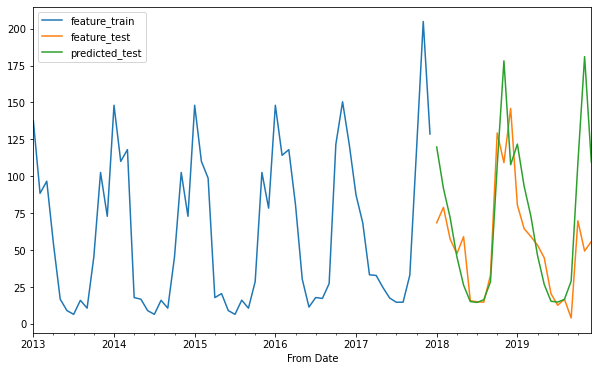

In [38]:
feature_train_NO.plot(legend=True, label='feature_train', figsize=(10,6))
feature_test_NO.plot(legend=True, label='feature_test')

pred_NO.plot(legend=True, label='predicted_test')

In [39]:
np.sqrt(mean_squared_error(feature_test_NO,pred_NO))

38.92400756461676

In [40]:
feature_train_NO.mean(), np.sqrt(feature_train_NO.var())

(61.88835673301023, 51.547443365461746)

# NO2

<AxesSubplot:xlabel='From Date'>

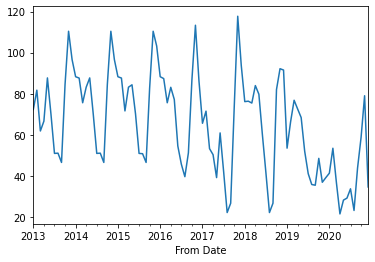

In [41]:
df['NO2'].plot()

<ipython-input-42-a9c62db99447>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df['NO2'],model='additive',freq=12).plot();


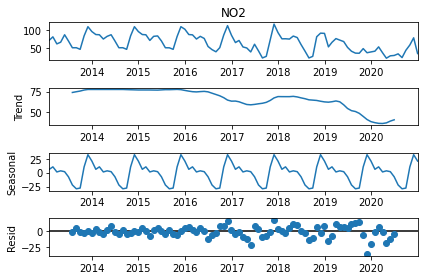

In [42]:
seasonal_decompose(df['NO2'],model='additive',freq=12).plot();

<ipython-input-43-3a97117d4e0a>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df['NO2'],model='multiplicative',freq=12).plot();


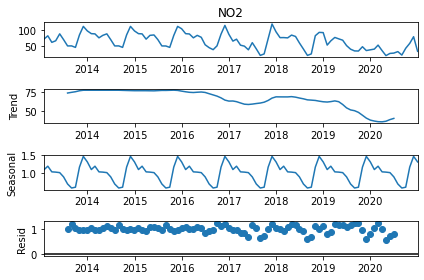

In [43]:
seasonal_decompose(df['NO2'],model='multiplicative',freq=12).plot();

In [44]:
feature_train_NO2=df.loc['2013-01-01':'2017-12-31','NO2']
feature_test_NO2=df.loc['2018-01-01':'2019-12-31','NO2']

In [45]:
hwmodel_NO2=ExponentialSmoothing(feature_train_NO2,trend='mul', seasonal='mul', seasonal_periods=12).fit()

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [46]:
pred_NO2=hwmodel_NO2.forecast(24)

In [47]:
pred_NO2

2018-01-31     81.209733
2018-02-28     83.360259
2018-03-31     67.978877
2018-04-30     74.158550
2018-05-31     76.358555
2018-06-30     63.177862
2018-07-31     46.454038
2018-08-31     42.007975
2018-09-30     41.503608
2018-10-31     76.480085
2018-11-30    104.049227
2018-12-31     88.048951
2019-01-31     76.224849
2019-02-28     78.243369
2019-03-31     63.806140
2019-04-30     69.606487
2019-05-31     71.671449
2019-06-30     59.299825
2019-07-31     43.602558
2019-08-31     39.429406
2019-09-30     38.955999
2019-10-31     71.785520
2019-11-30     97.662389
2019-12-31     82.644256
Freq: M, dtype: float64

<AxesSubplot:xlabel='From Date'>

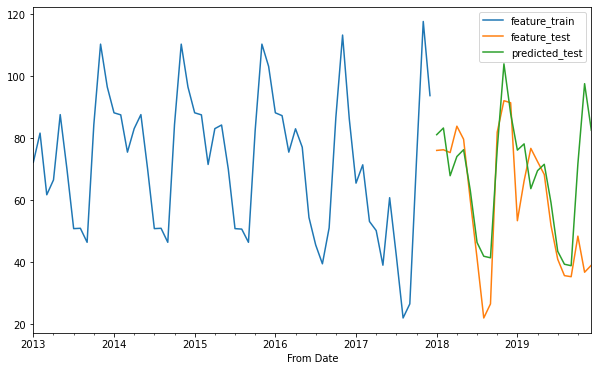

In [48]:
feature_train_NO2.plot(legend=True, label='feature_train', figsize=(10,6))
feature_test_NO2.plot(legend=True, label='feature_test')

pred_NO2.plot(legend=True, label='predicted_test')

In [49]:
np.sqrt(mean_squared_error(feature_test_NO2,pred_NO2))

18.422886706856897

In [50]:
feature_train_NO2.mean(), np.sqrt(feature_train_NO2.var())

(72.44717154201318, 22.232555892155613)

# NOx

<AxesSubplot:xlabel='From Date'>

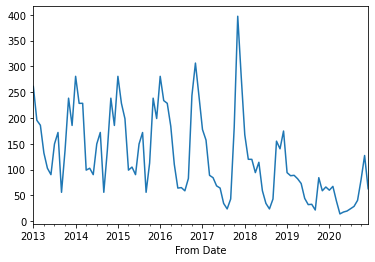

In [51]:
df['NOx'].plot()

<ipython-input-52-6143f48ed0de>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df['NOx'],model='additive',freq=12).plot();


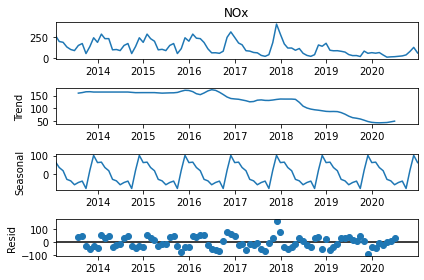

In [52]:
seasonal_decompose(df['NOx'],model='additive',freq=12).plot();

<ipython-input-53-2a803c90cb95>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df['NOx'],model='multiplicative',freq=12).plot();


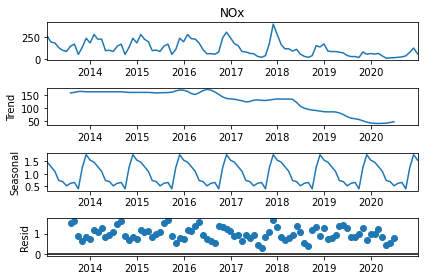

In [53]:
seasonal_decompose(df['NOx'],model='multiplicative',freq=12).plot();

In [54]:
feature_train_NOx=df.loc['2013-01-01':'2017-12-31','NOx']
feature_test_NOx=df.loc['2018-01-01':'2019-12-31','NOx']

In [55]:
hwmodel_NOx=ExponentialSmoothing(feature_train_NOx,trend='mul', seasonal='mul', seasonal_periods=12).fit()

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [56]:
pred_NOx=hwmodel_NOx.forecast(24)

In [57]:
pred_NOx

2018-01-31    342.041335
2018-02-28    286.083680
2018-03-31    266.498443
2018-04-30    173.075415
2018-05-31    139.761902
2018-06-30    117.464987
2018-07-31    173.490176
2018-08-31    199.099916
2018-09-30     72.071748
2018-10-31    198.982099
2018-11-30    336.137855
2018-12-31    256.306766
2019-01-31    313.892990
2019-02-28    262.540379
2019-03-31    244.566913
2019-04-30    158.832147
2019-05-31    128.260175
2019-06-30    107.798188
2019-07-31    159.212775
2019-08-31    182.714957
2019-09-30     66.140593
2019-10-31    182.606836
2019-11-30    308.475339
2019-12-31    235.213961
Freq: M, dtype: float64

<AxesSubplot:xlabel='From Date'>

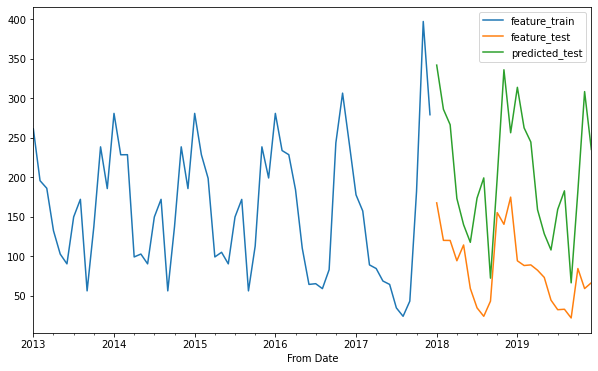

In [58]:
feature_train_NOx.plot(legend=True, label='feature_train', figsize=(10,6))
feature_test_NOx.plot(legend=True, label='feature_test')

pred_NOx.plot(legend=True, label='predicted_test')

In [59]:
np.sqrt(mean_squared_error(feature_test_NOx,pred_NOx))

136.14825827384394

In [60]:
feature_train_NOx.mean(), np.sqrt(feature_train_NOx.var())

(158.4185825299716, 81.53981231465993)

# NH3

<AxesSubplot:xlabel='From Date'>

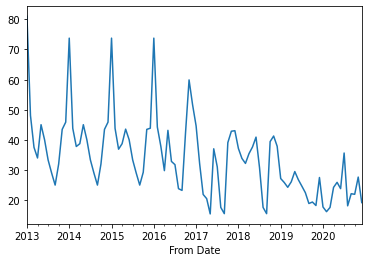

In [61]:
df['NH3'].plot()

<ipython-input-62-51e7115ad41c>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df['NH3'],model='additive',freq=12).plot();


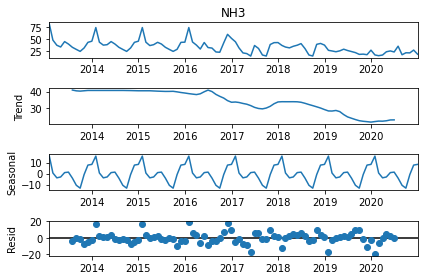

In [62]:
seasonal_decompose(df['NH3'],model='additive',freq=12).plot();

<ipython-input-63-969d2a6464cc>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df['NH3'],model='mul',freq=12).plot();


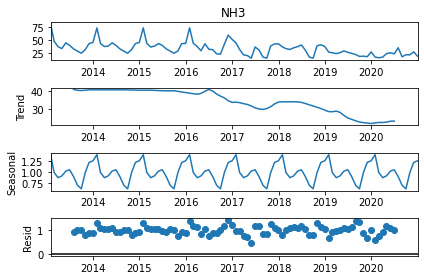

In [63]:
seasonal_decompose(df['NH3'],model='mul',freq=12).plot();

In [64]:
feature_train_NH3=df.loc['2013-01-01':'2017-12-31','NH3']
feature_test_NH3=df.loc['2018-01-01':'2019-12-31','NH3']

In [65]:
hwmodel_NH3=ExponentialSmoothing(feature_train_NH3,trend='mul', seasonal='mul', seasonal_periods=12).fit()

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [66]:
pred_NH3=hwmodel_NH3.forecast(24)

In [67]:
pred_NH3

2018-01-31    58.895620
2018-02-28    35.939939
2018-03-31    29.201773
2018-04-30    27.537910
2018-05-31    32.872665
2018-06-30    32.069378
2018-07-31    27.464499
2018-08-31    21.889262
2018-09-30    19.363286
2018-10-31    29.170282
2018-11-30    39.039813
2018-12-31    38.697446
2019-01-31    55.724340
2019-02-28    34.004725
2019-03-31    27.629380
2019-04-30    26.055109
2019-05-31    31.102611
2019-06-30    30.342577
2019-07-31    25.985651
2019-08-31    20.710618
2019-09-30    18.320655
2019-10-31    27.599585
2019-11-30    36.937684
2019-12-31    36.613752
Freq: M, dtype: float64

<AxesSubplot:xlabel='From Date'>

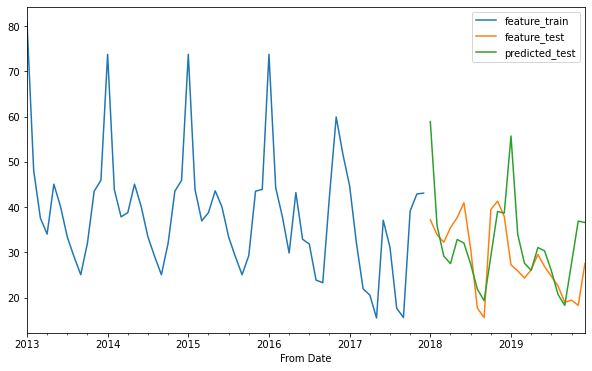

In [68]:
feature_train_NH3.plot(legend=True, label='feature_train', figsize=(10,6))
feature_test_NH3.plot(legend=True, label='feature_test')

pred_NH3.plot(legend=True, label='predicted_test')

In [69]:
np.sqrt(mean_squared_error(feature_test_NH3,pred_NH3))

9.58077938930985

In [70]:
feature_train_NH3.mean(), np.sqrt(feature_train_NH3.var())

(38.70227685589808, 13.427769166886067)

# SO2

<AxesSubplot:xlabel='From Date'>

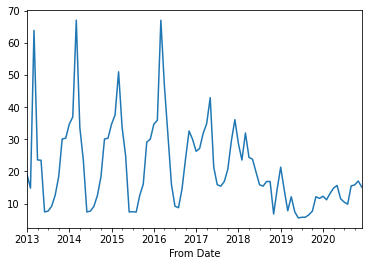

In [71]:
df['SO2'].plot()

<ipython-input-72-449247d05fd0>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df['SO2'],model='add',freq=12).plot();


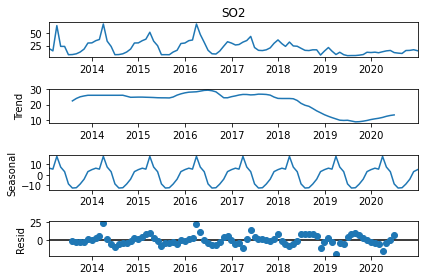

In [72]:
seasonal_decompose(df['SO2'],model='add',freq=12).plot();

<ipython-input-73-d30e6e71198d>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df['SO2'],model='mul',freq=12).plot();


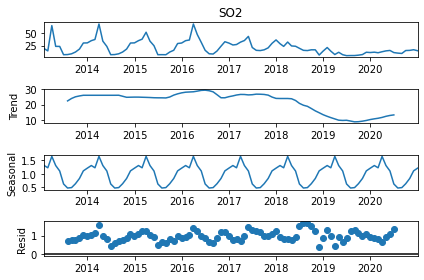

In [73]:
seasonal_decompose(df['SO2'],model='mul',freq=12).plot();

In [74]:
feature_train_SO2=df.loc['2013-01-01':'2017-12-31','SO2']
feature_test_SO2=df.loc['2018-01-01':'2019-12-31','SO2']

In [75]:
hwmodel_SO2=ExponentialSmoothing(feature_train_SO2,trend='mul', seasonal='mul', seasonal_periods=12).fit()

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [76]:
pred_SO2=hwmodel_SO2.forecast(24)

In [77]:
pred_SO2

2018-01-31    31.376741
2018-02-28    31.970594
2018-03-31    58.599680
2018-04-30    36.269808
2018-05-31    30.747125
2018-06-30    12.571708
2018-07-31    10.055443
2018-08-31    10.451782
2018-09-30    14.490228
2018-10-31    20.426025
2018-11-30    31.727556
2018-12-31    32.869025
2019-01-31    31.878390
2019-02-28    32.481737
2019-03-31    59.536568
2019-04-30    36.849687
2019-05-31    31.238708
2019-06-30    12.772704
2019-07-31    10.216209
2019-08-31    10.618885
2019-09-30    14.721897
2019-10-31    20.752595
2019-11-30    32.234814
2019-12-31    33.394532
Freq: M, dtype: float64

<AxesSubplot:xlabel='From Date'>

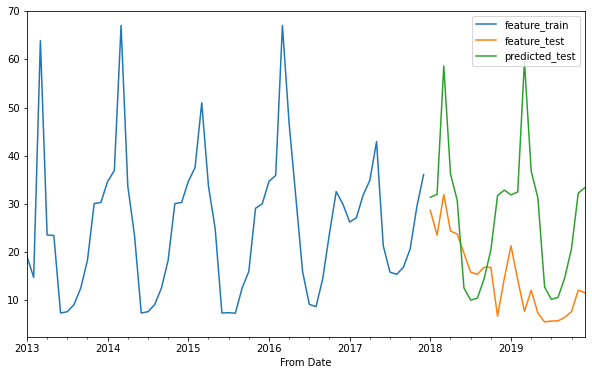

In [78]:
feature_train_SO2.plot(legend=True, label='feature_train', figsize=(10,6))
feature_test_SO2.plot(legend=True, label='feature_test')

pred_SO2.plot(legend=True, label='predicted_test')

In [79]:
np.sqrt(mean_squared_error(feature_test_SO2,pred_SO2))

17.788922899214246

In [80]:
feature_train_SO2.mean(), np.sqrt(feature_train_SO2.var())

(25.529598951215632, 14.454100243153288)

# CO

<AxesSubplot:xlabel='From Date'>

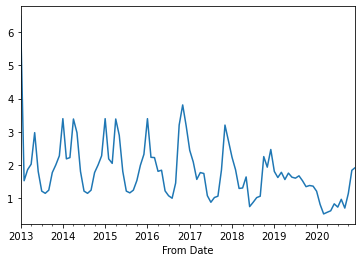

In [81]:
df['CO'].plot()

<ipython-input-82-3042d06280fa>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df['CO'],model='add',freq=12).plot();


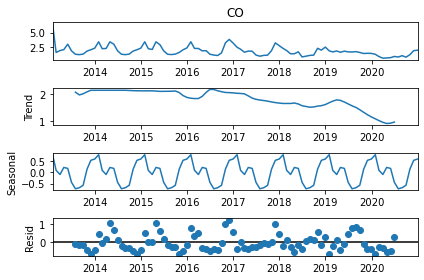

In [82]:
seasonal_decompose(df['CO'],model='add',freq=12).plot();

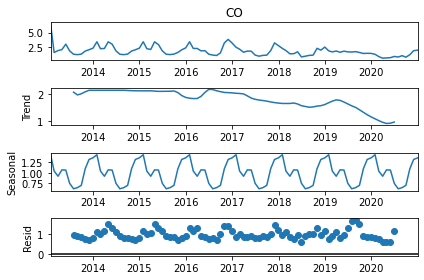

In [83]:
seasonal_decompose(df['CO'],model='mul',period=12).plot();

In [84]:
feature_train_CO=df.loc['2013-01-01':'2017-12-31','CO']
feature_test_CO=df.loc['2018-01-01':'2019-12-31','CO']

In [85]:
hwmodel_CO=ExponentialSmoothing(feature_train_CO,trend='mul', seasonal='mul', seasonal_periods=12).fit()

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [86]:
pred_CO=hwmodel_CO.forecast(24)

In [87]:
pred_CO

2018-01-31    2.143505
2018-02-28    1.632068
2018-03-31    1.366868
2018-04-30    1.517925
2018-05-31    1.496652
2018-06-30    0.948929
2018-07-31    0.773449
2018-08-31    0.832001
2018-09-30    0.942681
2018-10-31    1.711551
2018-11-30    2.523302
2018-12-31    1.796225
2019-01-31    1.756518
2019-02-28    1.337416
2019-03-31    1.120095
2019-04-30    1.243879
2019-05-31    1.226448
2019-06-30    0.777610
2019-07-31    0.633811
2019-08-31    0.681792
2019-09-30    0.772490
2019-10-31    1.402548
2019-11-30    2.067746
2019-12-31    1.471935
Freq: M, dtype: float64

<AxesSubplot:xlabel='From Date'>

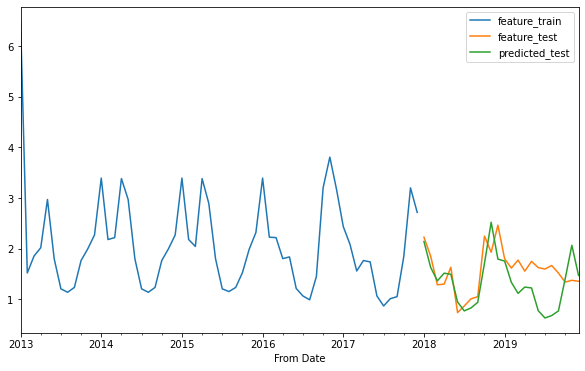

In [88]:
feature_train_CO.plot(legend=True, label='feature_train', figsize=(10,6))
feature_test_CO.plot(legend=True, label='feature_test')

pred_CO.plot(legend=True, label='predicted_test')

In [89]:
np.sqrt(mean_squared_error(feature_test_CO,pred_CO))

0.4951412177554679

In [90]:
feature_train_CO.mean(), np.sqrt(feature_train_CO.var())

(2.0797263650528808, 0.9615353974667701)

# Ozone

<AxesSubplot:xlabel='From Date'>

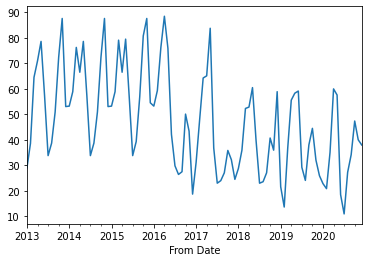

In [91]:
df['Ozone'].plot()

<ipython-input-92-e7f96ce40f6b>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df['Ozone'],model='add',freq=12).plot();


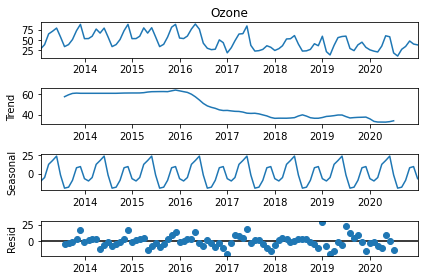

In [92]:
seasonal_decompose(df['Ozone'],model='add',freq=12).plot();

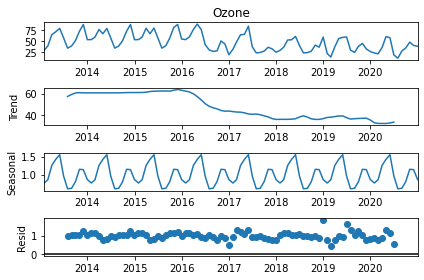

In [93]:
seasonal_decompose(df['Ozone'],model='mul',period=12).plot();

In [94]:
feature_train_Ozone=df.loc['2013-01-01':'2017-12-31','Ozone']
feature_test_Ozone=df.loc['2018-01-01':'2019-12-31','Ozone']

In [95]:
hwmodel_Ozone=ExponentialSmoothing(feature_train_Ozone,trend='add', seasonal='add', seasonal_periods=12).fit()

C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Kira\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [96]:
pred_Ozone=hwmodel_Ozone.forecast(24)

In [97]:
pred_Ozone

2018-01-31    22.364747
2018-02-28    31.088682
2018-03-31    50.442876
2018-04-30    49.886085
2018-05-31    57.639811
2018-06-30    28.550058
2018-07-31     9.241282
2018-08-31    11.826420
2018-09-30    21.029502
2018-10-31    40.655691
2018-11-30    46.065854
2018-12-31    19.156208
2019-01-31    20.891751
2019-02-28    29.615687
2019-03-31    48.969881
2019-04-30    48.413090
2019-05-31    56.166816
2019-06-30    27.077063
2019-07-31     7.768287
2019-08-31    10.353425
2019-09-30    19.556506
2019-10-31    39.182696
2019-11-30    44.592859
2019-12-31    17.683213
Freq: M, dtype: float64

<AxesSubplot:xlabel='From Date'>

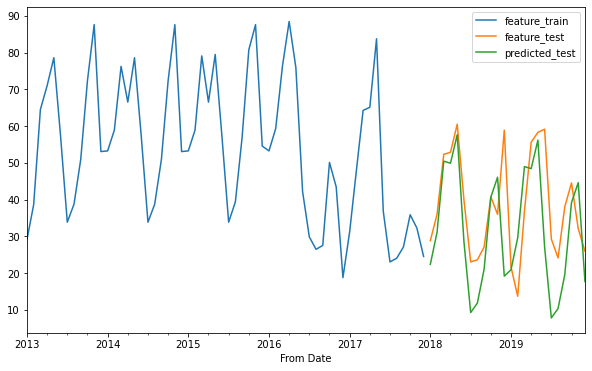

In [98]:
feature_train_Ozone.plot(legend=True, label='feature_train', figsize=(10,6))
feature_test_Ozone.plot(legend=True, label='feature_test')

pred_Ozone.plot(legend=True, label='predicted_test')

In [99]:
np.sqrt(mean_squared_error(feature_test_Ozone,pred_Ozone))

14.42477410556316

In [100]:
feature_train_Ozone.mean(), np.sqrt(feature_train_Ozone.var())

(53.95785535780499, 19.874931415428016)